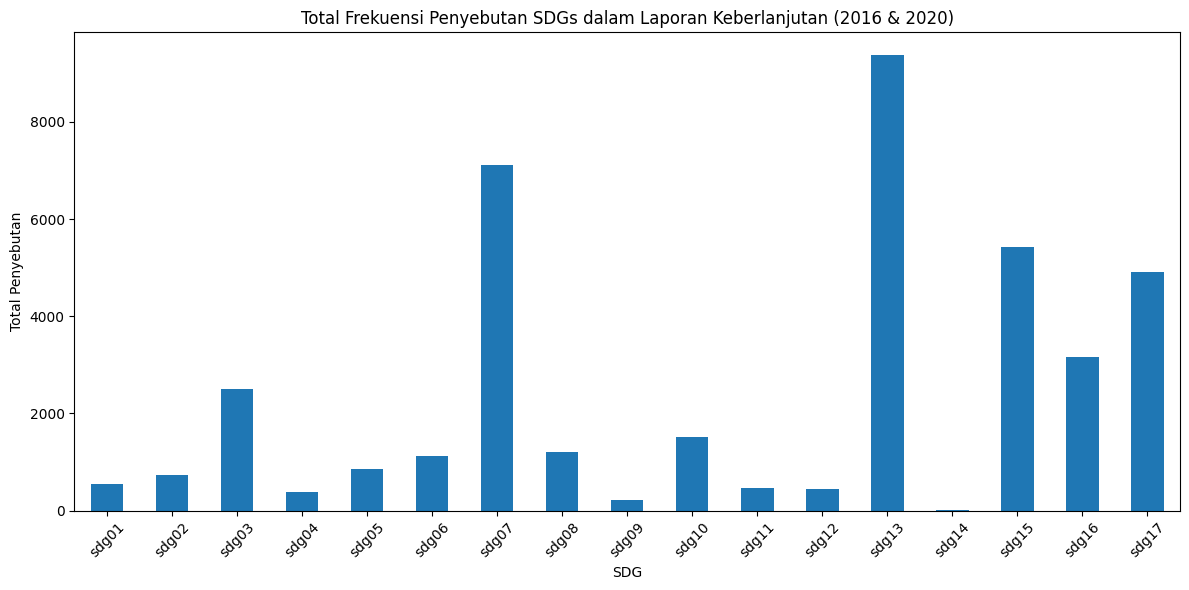

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Baca file frekuensi absolut
absolute_df = pd.read_csv("SDG_frequencies_absolute.txt", sep=",", quotechar='"')

# Perbaiki nama kolom jika perlu
absolute_df = absolute_df.rename(columns={"sgd17": "sdg17"})

# Pilih kolom SDG01 - SDG17
sdg_columns = [col for col in absolute_df.columns if col.startswith("sdg") and col[3:].isdigit()]
sdg_data = absolute_df[sdg_columns]

# Hitung total frekuensi per SDG
sdg_totals = sdg_data.sum()

# Plot
plt.figure(figsize=(12,6))
sdg_totals.plot(kind="bar")
plt.title("Total Frekuensi Penyebutan SDGs dalam Laporan Keberlanjutan (2016 & 2020)")
plt.xlabel("SDG")
plt.ylabel("Total Penyebutan")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

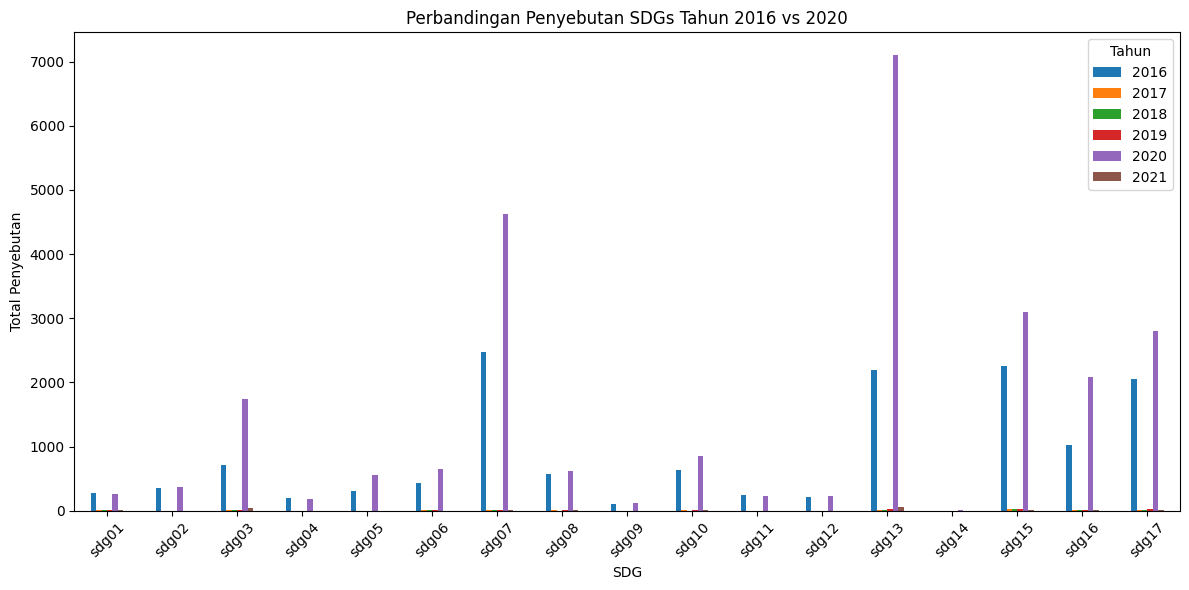

In [2]:
# Hitung total penyebutan per tahun
totals_by_year = absolute_df.groupby("year")[sdg_columns].sum().T

# Plot grouped bar chart
ax = totals_by_year.plot(kind="bar", figsize=(12,6))
plt.title("Perbandingan Penyebutan SDGs Tahun 2016 vs 2020")
plt.xlabel("SDG")
plt.ylabel("Total Penyebutan")
plt.xticks(rotation=45)
plt.legend(title="Tahun")
plt.tight_layout()
plt.show()

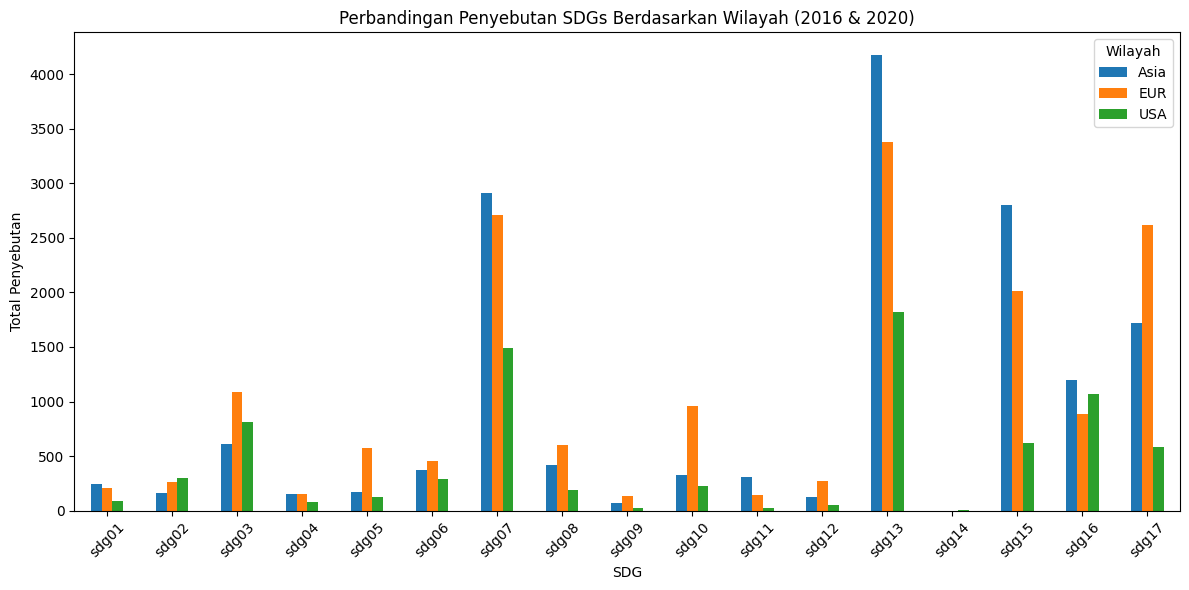

In [3]:
# Ubah label wilayah JKT -> Asia
region_df = absolute_df.copy()
region_df["ctrygrp"] = region_df["ctrygrp"].replace({"JKT": "Asia"})

# Hitung total penyebutan per wilayah
totals_by_region = region_df.groupby("ctrygrp")[sdg_columns].sum().T

# Plot grouped bar chart
ax = totals_by_region.plot(kind="bar", figsize=(12,6))
plt.title("Perbandingan Penyebutan SDGs Berdasarkan Wilayah (2016 & 2020)")
plt.xlabel("SDG")
plt.ylabel("Total Penyebutan")
plt.xticks(rotation=45)
plt.legend(title="Wilayah")
plt.tight_layout()
plt.show()